In [ ]:
import pandas as pd
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table
import plotly.express as px
import plotly.graph_objects as go
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
trock_5T = query_table(table='r707lv_trockner_5T')

In [27]:
X = trock_5T['kw'].values.reshape(-1, 1)

### Operating Modes

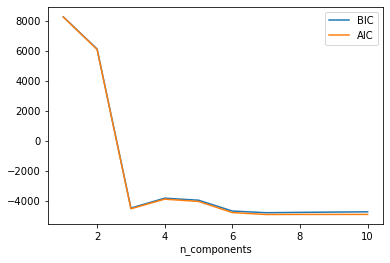

In [28]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC') 
plt.plot(n_components, [m.aic(X) for m in models], label='AIC') 
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
models = BayesianGaussianMixture(n_components=4, random_state=0, n_init=1).fit(X)
models.predict(X)

In [29]:
gmm = GaussianMixture(n_components=6, covariance_type='full')
gmm.fit(X)
labels = gmm.predict(X)
trock_5T['labels'] = labels

In [30]:
px.line(x=trock_5T.index, y=trock_5T.kw, color=labels, markers=True)
#px.scatter(x=trock_5T.index, y=trock_5T.kw, color=labels)

In [ ]:
cluster_3 = trock_5T[trock_5T['labels'] == 1]
sns.histplot(cluster_3['kw'])

### Operating Modes + Time Component

In [31]:
#trock_1H = query_table(table='r707lv_trockner_1H')
trock_1T = query_table(table='r707lv_trockner_5T')

In [ ]:
# Add time features
trock_1H['day_week'] = trock_1H.index.dayofweek
trock_1H['hour'] = trock_1H.index.hour
trock_1H['day'] = trock_1H.index.day

In [32]:
# Add time features
trock_1T['day_week'] = trock_1T.index.dayofweek
trock_1T['hour'] = trock_1T.index.hour
trock_1T['day'] = trock_1T.index.day
trock_1T['minute'] = trock_1T.index.minute
#trock_1T['second'] = trock_1T.index.second

In [ ]:
trock_1T

In [ ]:
# Typical daily profiles - hourly granularity
trock_pivot = trock_1H.pivot(
    index='day',
    columns='hour',
    values='kw'
)

trock_pivot.dropna(axis=0, how='any', inplace=True)

In [33]:
# Typical daily consumption profiles - minute granularity
trock_pivot = trock_1T.pivot(
    index=['day', 'hour'],
    columns=['minute'],
    values='kw'
)

trock_pivot.dropna(axis=0, how='any', inplace=True)

In [ ]:
# Typical hourly consumption profiles - minute granularity
trock_pivot = trock_1T.pivot(
    index=['day', 'hour', 'minute'],
    columns=['second'],
    values='kw'
)

trock_pivot.dropna(axis=0, how='any', inplace=True)

In [ ]:
trock_pivot

In [34]:
trock_pivot_feats = trock_pivot.columns
X = trock_pivot[trock_pivot_feats].values

gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)
trock_pivot['labels'] = labels

In [35]:
def plot_cluster(df, cluster):
    cluster = trock_pivot[trock_pivot['labels'] == cluster]
    cluster = cluster.droplevel(0)

    N, K = cluster.shape
    data = {
        "value": cluster.to_numpy().ravel("F"),
        #"variable": np.asarray(cluster.columns).repeat(N),
        "hour": np.tile(np.asarray(cluster.index), K),
    }
    

    return px.scatter(data_frame=data, x='hour', y='value')
    

In [ ]:
plot_cluster(trock_pivot, 0)

In [ ]:
plot_cluster(trock_pivot, 1)

In [ ]:
plot_cluster(trock_pivot, 2)

In [ ]:
plot_cluster(trock_pivot, 3)

In [ ]:
plot_cluster(trock_pivot, 4)

In [ ]:
plot_cluster(trock_pivot, 5)

In [ ]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC') 
plt.plot(n_components, [m.aic(X) for m in models], label='AIC') 
plt.legend(loc='best')
plt.xlabel('n_components');